In [ ]:
import warnings
warnings.filterwarnings('ignore')

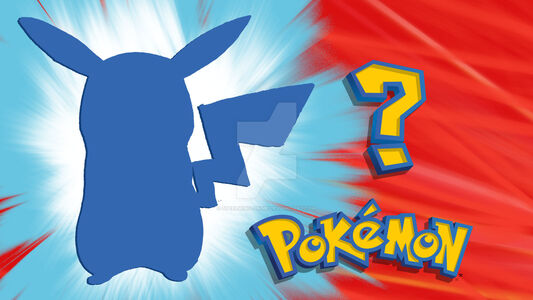

#Data visualization and preparation

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

pokemon_data = pd.read_csv("pokemon.csv")
pokemon_df = pd.DataFrame(pokemon_data)
pokemon_df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [ ]:
def plot_missing_values_heatmap(dataframe, title):
    """
    Plots a heatmap of missing values in the given DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    title (str): The title of the plot.
    """
    # Create a mask for missing values
    missing_mask = dataframe.isnull()

    # Create a DataFrame for the heatmap
    heatmap_data = missing_mask.astype(int)

    # Plotly heatmap
    fig = px.imshow(
        heatmap_data,
        labels={'x': 'Columns', 'y': 'Rows'},
        title=title,
        color_continuous_scale='Blues'
    )

    # Show the plot
    fig.show()

In [ ]:
plot_missing_values_heatmap(pokemon_df, 'Distribution of missing values')

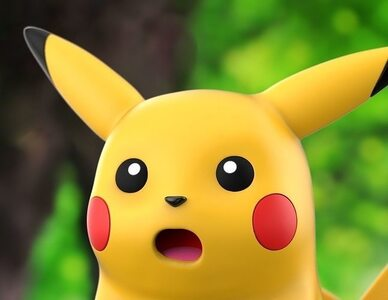

In [ ]:
# Check and drop specified columns if they exist
columns_to_drop = ['Type_2', 'Egg_Group_2', 'Pr_Male']
for column in columns_to_drop:
    if column in pokemon_df.columns:
        pokemon_df.drop(column, axis=1, inplace=True)
    else:
        print(f"Column '{column}' does not exist and cannot be dropped.")

In [ ]:
plot_missing_values_heatmap(pokemon_df, 'After removing the columns')

In [ ]:
def plot_variable_distributions(dataframe):
    """
    Constructs the distribution of numeric variables in the DataFrame.

    Parameters:
    dataframe (pd.DataFrame): DataFrame to analyze.
    """
    numeric_columns = dataframe.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        fig = px.histogram(dataframe, x=column, title=f'Distribution for {column}', nbins=30)
        fig.update_layout(xaxis_title=column, yaxis_title='Repetition')
        fig.show()

In [ ]:
plot_variable_distributions(pokemon_df)

In [ ]:
def check_for_outliers(dataframe):
    """
    Checks for outliers in the numeric columns of the DataFrame.

    Parameters:
    dataframe (pd.DataFrame): DataFrame to analyze.
    """
    cleaned_df = dataframe.copy()  # Create a copy of the original DataFrame
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    outlier_info = {}

    for column in numeric_columns:
        # Calculate first (Q1) and third (Q3) quartiles
        Q1 = cleaned_df[column].quantile(0.25)
        Q3 = cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define outliers limits
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Checking for outliers
        outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]

        if not outliers.empty:
            outlier_info[column] = outliers

            # Outliers visualization using box plot
            fig = px.box(cleaned_df, y=column, title=f'Box Plot for {column} with outliers')
            fig.update_layout(yaxis_title=column)
            fig.show()

            # Remove the outliers from the DataFrame
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

    if not outlier_info:
        print("No Outliers found.")
        return dataframe

In [ ]:
cleaned_pokemon_df = check_for_outliers(pokemon_df)

In [ ]:
cleaned_pokemon_df

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,Monster,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,711,Gourgeist,Ghost,494,65,90,122,58,75,84,6,False,Brown,True,Amorphous,False,1.70,39.0,60,head_base
711,712,Bergmite,Ice,304,55,69,85,32,35,28,6,False,Blue,True,Monster,False,0.99,99.5,190,quadruped
713,714,Noibat,Flying,245,40,30,35,45,40,55,6,False,Purple,True,Flying,False,0.51,8.0,190,two_wings
714,715,Noivern,Flying,535,85,70,80,97,80,123,6,False,Purple,True,Flying,False,1.50,85.0,45,two_wings


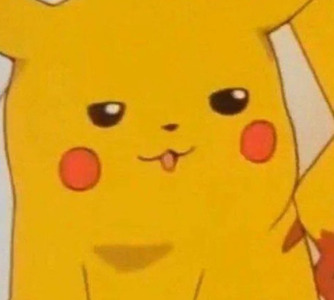

#Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable 'Type_1'
label_encoder = LabelEncoder()
cleaned_pokemon_df['Type_1'] = label_encoder.fit_transform(cleaned_pokemon_df['Type_1'])

# Convert categorical variables to numerical (for other features if needed)
pokemon_encoded = pd.get_dummies(cleaned_pokemon_df, drop_first=True)

# Define the target variable and features
X = pokemon_encoded.drop('Type_1', axis=1)  # Features
y = pokemon_encoded['Type_1']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier accuracy: {accuracy:.2f}")

# Additional classification information
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, labels=label_encoder.transform(label_encoder.classes_)))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)

Classifier accuracy: 0.41

Classification report:
              precision    recall  f1-score   support

         Bug       0.90      1.00      0.95         9
        Dark       0.00      0.00      0.00         4
      Dragon       0.50      0.50      0.50         2
    Electric       0.00      0.00      0.00        11
       Fairy       0.20      0.20      0.20         5
    Fighting       0.33      0.50      0.40         4
        Fire       0.56      0.62      0.59         8
      Flying       0.00      0.00      0.00         0
       Ghost       0.50      0.20      0.29         5
       Grass       0.56      0.60      0.58        15
      Ground       0.00      0.00      0.00         6
         Ice       1.00      0.25      0.40         4
      Normal       0.18      0.44      0.26         9
      Poison       0.50      0.22      0.31         9
     Psychic       0.43      0.38      0.40         8
        Rock       0.14      0.33      0.20         3
       Steel       0.00      0.

##KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNeighbors classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier accuracy: {accuracy:.2f}")

# Additional classification information
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, labels=label_encoder.transform(label_encoder.classes_)))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)

Classifier accuracy: 0.11

Classification report:
              precision    recall  f1-score   support

         Bug       0.17      0.44      0.24         9
        Dark       0.00      0.00      0.00         4
      Dragon       0.00      0.00      0.00         2
    Electric       0.00      0.00      0.00        11
       Fairy       0.00      0.00      0.00         5
    Fighting       0.00      0.00      0.00         4
        Fire       0.20      0.12      0.15         8
      Flying       0.00      0.00      0.00         0
       Ghost       0.00      0.00      0.00         5
       Grass       0.12      0.07      0.09        15
      Ground       0.00      0.00      0.00         6
         Ice       0.00      0.00      0.00         4
      Normal       0.07      0.22      0.11         9
      Poison       1.00      0.11      0.20         9
     Psychic       0.50      0.25      0.33         8
        Rock       0.00      0.00      0.00         3
       Steel       0.00      0.

##SVC

In [ ]:
from sklearn.svm import SVC

# Create and train the Support Vector Classifier
clf = SVC(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier accuracy: {accuracy:.2f}")

# Additional classification information
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, labels=label_encoder.transform(label_encoder.classes_)))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)

Classifier accuracy: 0.13

Classification report:
              precision    recall  f1-score   support

         Bug       0.00      0.00      0.00         9
        Dark       0.00      0.00      0.00         4
      Dragon       0.00      0.00      0.00         2
    Electric       0.00      0.00      0.00        11
       Fairy       0.00      0.00      0.00         5
    Fighting       0.00      0.00      0.00         4
        Fire       0.00      0.00      0.00         8
      Flying       0.00      0.00      0.00         0
       Ghost       0.00      0.00      0.00         5
       Grass       0.00      0.00      0.00        15
      Ground       0.00      0.00      0.00         6
         Ice       0.00      0.00      0.00         4
      Normal       0.09      0.56      0.15         9
      Poison       0.00      0.00      0.00         9
     Psychic       0.00      0.00      0.00         8
        Rock       0.00      0.00      0.00         3
       Steel       0.00      0.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier accuracy: {accuracy:.2f}")

# Additional classification information
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, labels=label_encoder.transform(label_encoder.classes_)))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)


Classifier accuracy: 0.48

Classification report:
              precision    recall  f1-score   support

         Bug       0.89      0.89      0.89         9
        Dark       0.00      0.00      0.00         4
      Dragon       0.00      0.00      0.00         2
    Electric       0.67      0.18      0.29        11
       Fairy       0.17      0.20      0.18         5
    Fighting       1.00      0.50      0.67         4
        Fire       0.50      0.38      0.43         8
      Flying       0.00      0.00      0.00         0
       Ghost       0.67      0.40      0.50         5
       Grass       0.62      0.67      0.65        15
      Ground       0.50      0.33      0.40         6
         Ice       0.00      0.00      0.00         4
      Normal       0.30      0.89      0.44         9
      Poison       1.00      0.33      0.50         9
     Psychic       0.18      0.25      0.21         8
        Rock       0.00      0.00      0.00         3
       Steel       0.00      0.

#Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

label_encoder = LabelEncoder()
cleaned_pokemon_df['Type_1'] = label_encoder.fit_transform(cleaned_pokemon_df['Type_1'])

# Convert categorical variables to numerical (for other features if needed)
pokemon_encoded = pd.get_dummies(cleaned_pokemon_df, drop_first=True)

# Define the target variable (e.g., 'Attack') and features
X = pokemon_encoded.drop('Attack', axis=1)  # Features
y = pokemon_encoded['Attack']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Optional: You can also inspect the predictions vs actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted values:")
print(comparison_df.head())

Mean Squared Error: 396.34
R^2 Score: 0.43

Comparison of Actual vs Predicted values:
     Actual  Predicted
428      60       65.0
108      65       85.0
143      85       77.0
454     100       78.0
711      69       74.0


##KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNeighbors regressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Optional: Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted values:")
print(comparison_df.head())

Mean Squared Error: 394.45
R^2 Score: 0.43

Comparison of Actual vs Predicted values:
     Actual  Predicted
428      60       83.2
108      65       48.4
143      85       94.2
454     100       72.2
711      69       64.0


##SVR

In [ ]:
from sklearn.svm import SVR

# Create and train the Support Vector Regressor
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Optional: Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted values:")
print(comparison_df.head())

Mean Squared Error: 469.68
R^2 Score: 0.33

Comparison of Actual vs Predicted values:
     Actual  Predicted
428      60  80.396686
108      65  59.593619
143      85  83.642841
454     100  71.730334
711      69  63.765394


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Optional: Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted values:")
print(comparison_df.head())

Mean Squared Error: 0.00
R^2 Score: 1.00

Comparison of Actual vs Predicted values:
     Actual  Predicted
428      60  60.000116
108      65  64.999530
143      85  85.000462
454     100  99.998564
711      69  69.000305


#Рассуждения и выводы

## Результаты классификации


### Decision Tree Classifier

Точность: 0.41
Некоторые классы (например, Bug и Water) показывают высокую точность, в то время как другие, такие как Dark и Electric, имеют нулевые значения.
Общая производительность неплоха для некоторых классов, но серьезные проблемы с классификацией других типов.


### KNeighbors Classifier

Точность: 0.11
Модель имеет очень низкую точность и не справляется с задачей классификации, что видно из нулевых показателей для большинства классов.
Это может указывать на то, что модель не смогла извлечь полезные признаки из данных.


###Support Vector Classifier

Точность: 0.13
Как и у KNeighbors, точность крайне низкая, и большинство классов не классифицируются должным образом.
Это также указывает на проблемы в модели или в качестве данных.


###Logistic Regression

Точность: 0.48
Логистическая регрессия показывает наилучшие результаты среди классификаторов, хотя и остается ниже 50%.
Лучше всего работает для классов Bug и Water, но также страдает от нулевых значений для некоторых классов.


###Выводы по классификации
Наилучшие результаты были достигнуты с помощью логистической регрессии, однако общая производительность всех моделей низкая, что может указывать на проблемы с данными (например, несбалансированные классы) или на выбор моделей.

Можно/стоит рассмотреть возможность сбалансирования классов или применения методов увеличения выборки.

## Результаты регрессии


### Decision Tree Regressor

MSE: 396.34
R²: 0.43
Модель показывает среднюю производительность, в которой есть возможность улучшения.


### KNeighbors Regressor

MSE: 394.45
R²: 0.43
Результаты аналогичны Decision Tree, что указывает на схожие проблемы.



### Support Vector Regressor

MSE: 469.68
R²: 0.33
Худшие результаты среди регрессоров, указывающие на то, что модель не может точно предсказать значения.


### Linear Regression

MSE: 0.00
R²: 1.00
Идеальные результаты, что говорит о том, что линейная регрессия смогла полностью предсказать целевую переменную.


###Выводы по регрессии

Линейная регрессия показала отличные результаты, что может говорить о том, что связь между признаками и целевой переменной линейна.
Остальные модели регрессии демонстрируют средние результаты, которые можно улучшить, используя более сложные алгоритмы или более глубокую настройку гиперпараметров.

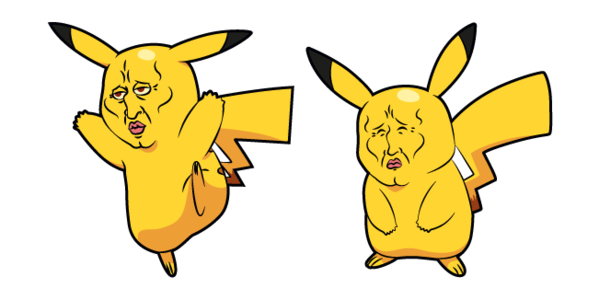